In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
portfolio3 = pd.read_csv('estaticos_portfolio3.csv')
market_encoded = pd.read_csv('market_clean_enconded.csv')
portfolio1 = pd.read_csv('estaticos_portfolio1.csv')
portfolio2 = pd.read_csv('estaticos_portfolio2.csv')


In [4]:
portfolio1 = portfolio1.drop(['Unnamed: 0'], axis = 1)
portfolio2 = portfolio2.drop(['Unnamed: 0'], axis = 1)
portfolio3 = portfolio3.drop(['Unnamed: 0'], axis = 1)

In [5]:
print('Shape do Portfolio1 é', portfolio1.shape)
print('Shape do Portfolio2 é', portfolio2.shape)
print('Shape do Portfolio3 é', portfolio3.shape)
print('Shape do Market é', market_encoded.shape)

Shape do Portfolio1 é (555, 181)
Shape do Portfolio2 é (566, 1)
Shape do Portfolio3 é (265, 1)
Shape do Market é (462298, 40)


## Analisando se os ids estão presentes nos 3 portfólios, se está só em 2 ou só em 1 portfólio

In [6]:
port1 = list(portfolio1['id'])
port2 = list(portfolio2['id'])
port3 = list(portfolio3['id'])

In [7]:
port1_port2 = [x for x in port1 if x in port2]
port1_port3 = [x for x in port1 if x in port3]
port2_port3 = [x for x in port2 if x in port3]
port1_port2_port3 = [x for x in port1 if x in port2 and port3]

In [8]:
print(f"Port1 and Port2: {len(port1_port2)}")
print(f"Port1 and Port3: {len(port1_port3)}")
print(f"Port2 and Port3: {len(port2_port3)}")
print(f"Port1, Port2 and Port3: {len(port1_port2_port3)}")

Port1 and Port2: 0
Port1 and Port3: 0
Port2 and Port3: 108
Port1, Port2 and Port3: 0


# Pegando os ids do Market que não estão em nenhum portfólio

In [9]:
just_market = pd.read_csv('merge_not.csv')

In [10]:
just_market.head()

,Unnamed: 0,fl_matriz,idade_empresa_anos,fl_me,fl_sa,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,...,nm_segmento,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,de_nivel_atividade,nm_meso_regiao,nm_micro_regiao,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,id
0,0,1,14.457534,0,0,0,0,0,1,1,...,10,19,4,0,0,6,48,2,2,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...
1,1,1,1.463014,0,0,1,0,0,1,1,...,3,16,2,1,1,4,69,10,10,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...
2,2,1,7.093151,0,0,1,0,0,0,1,...,20,2,0,0,2,2,43,1,1,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...
3,3,1,6.512329,0,0,0,0,0,1,1,...,17,2,0,0,2,2,43,10,10,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...
4,4,1,3.200000,0,0,0,0,0,1,1,...,8,19,4,0,0,6,48,10,10,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...


In [11]:
just_market = just_market.drop(['Unnamed: 0'], axis = 1)

# Merge nos portfólios  com o market

In [12]:
df_portfolio2 = pd.merge(portfolio2, market_encoded, on='id')
df_portfolio3 = pd.merge(portfolio3, market_encoded, on='id')

In [13]:
df_portfolio1 = pd.merge(portfolio1.id, market_encoded, on='id')

#### Tirando uma amostra do portfólio 1 para depois colocar na base de teste para verificar se serão recomendados para o portfólio 1

In [47]:
df_portfolio1.shape

(555, 40)

In [48]:
df_portfolio1_part = df_portfolio1[0:490]

In [49]:
amostra_port1 = df_portfolio1[490:]

## Criando um portfólio 4 que será os ids que estão no portfólio 2 e 3

In [24]:
portfolio4 = pd.DataFrame(port2_port3, columns = ['id'])

In [26]:
portfolio4.head()

,id
0,16843c9ffb920170477118933798510d8d5f00f5c56c12...
1,3aafa3a1f12f483740a52956af100223333d0e3c79bf2c...
2,c60431fbca90067f105570e1e8a684bcd7048205bbf6c4...
3,2206453fbc92af65e47ce6ee2be27fa90ac427845ea0a5...
4,4b03e2427c4d2782f21a03f4336f613709f6c0b51f6b75...


In [29]:
df_portfolio4 =pd.merge(portfolio4, market_encoded, on='id')

In [30]:
df_portfolio4.head()

,id,fl_matriz,idade_empresa_anos,fl_me,fl_sa,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,...,nm_divisao,nm_segmento,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,de_nivel_atividade,nm_meso_regiao,nm_micro_regiao,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo
0,16843c9ffb920170477118933798510d8d5f00f5c56c12...,1,16.389041,0,0,0,0,0,0,1,...,36,11,16,4,0,0,9,11,3,3
1,3aafa3a1f12f483740a52956af100223333d0e3c79bf2c...,1,43.854795,0,0,0,0,0,0,0,...,0,0,16,1,0,0,4,72,3,3
2,c60431fbca90067f105570e1e8a684bcd7048205bbf6c4...,1,43.865753,0,0,0,0,0,0,0,...,0,0,19,1,0,0,0,8,5,5
3,2206453fbc92af65e47ce6ee2be27fa90ac427845ea0a5...,1,11.035616,0,0,0,0,0,1,1,...,82,5,20,4,0,0,19,73,3,3
4,4b03e2427c4d2782f21a03f4336f613709f6c0b51f6b75...,1,43.846575,0,0,0,0,0,0,0,...,0,0,19,1,0,0,11,71,4,4


#### Tirando uma amostra do portfólio 4 para depois colocar na base de teste para verificar se serão recomendados para o portfólio 4

In [31]:
df_portfolio4.shape

(108, 40)

In [32]:
df_portfolio4_part = df_portfolio4[0:88]

In [33]:
amostra_port4 = df_portfolio4[88:]

## Tirando o portfólio 4 do portfólio 2

In [37]:
df_portfolio2_without4 = df_portfolio2[~df_portfolio2['id'].isin(df_portfolio4['id'])]

#### Tirando uma amostra do portfólio 2 para depois colocar na base de teste para verificar se serão recomendados para o portfólio 2

In [38]:
df_portfolio2_without4.shape

(458, 40)

In [39]:
df_portfolio2_part = df_portfolio2_without4[0:400]

In [40]:
amostra_port2 = df_portfolio2_without4[400:]

## Tirando o portfólio 4 do portfólio 3

In [41]:
df_portfolio3_without4 = df_portfolio3[~df_portfolio3['id'].isin(df_portfolio4['id'])]

#### Tirando uma amostra do portfólio 3 para depois colocar na base de teste para verificar se serão recomendados para o portfólio 3

In [42]:
df_portfolio3_without4.shape

(157, 40)

In [44]:
df_portfolio3_part = df_portfolio3_without4[0:110]

In [45]:
amostra_port3 = df_portfolio3_without4[110:]

## Colocando uma coluna de target 0 para os que são do portfólio 1

In [50]:
df_portfolio1_part_target = df_portfolio1_part.copy()

In [52]:
df_portfolio1_part_target['Target'] = 0

In [53]:
df_portfolio1_part_target.head()

,id,fl_matriz,idade_empresa_anos,fl_me,fl_sa,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,...,nm_segmento,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,de_nivel_atividade,nm_meso_regiao,nm_micro_regiao,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,Target
0,dabe79bec87c88ae04e869bf6bd321ee5e1893cecf6625...,1,0.646575,0,0,1,0,0,0,0,...,9,16,2,4,1,14,61,10,10,0
1,32e5f4e10932153a7ba869cb0386e7e02d49d2461046b8...,0,6.586301,0,0,0,0,0,1,1,...,9,9,4,0,2,3,44,10,7,0
2,a95d6f30bba445bd3d6b0c5b36f865b38ec01d17336090...,1,8.010959,0,0,1,0,0,0,0,...,9,9,1,0,2,8,0,1,1,0
3,6cb309685cea0b6d2988818792ec2e6fcb2bd02e0afa9e...,1,20.863014,0,0,0,0,0,0,0,...,9,19,4,0,0,11,70,1,1,0
4,f72aa7fa6787b0a5a1c88885b6120850df8ee0f71adc25...,1,18.726027,0,0,0,0,0,1,1,...,9,19,4,0,0,6,48,2,8,0


## Colocando uma coluna de target 1 para os que são do portfólio 2

In [54]:
df_portfolio2_part_target = df_portfolio2_part.copy()

In [56]:
df_portfolio2_part_target['Target'] = 1

In [57]:
df_portfolio2_part_target.head()

,id,fl_matriz,idade_empresa_anos,fl_me,fl_sa,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,...,nm_segmento,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,de_nivel_atividade,nm_meso_regiao,nm_micro_regiao,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,Target
0,09e95c1a84049001d086470a8f320a19b076f955a89122...,1,11.243836,0,0,0,0,0,1,1,...,0,0,4,0,0,17,57,6,6,1
1,dc9d155f5bcd3172031e2ec9431786e8871ff4b0ff4728...,1,43.789041,0,0,0,0,0,0,0,...,0,19,4,0,0,0,1,4,4,1
3,ff045934d90aab184dd15e66daf3b3c97193bda5449298...,1,39.671233,0,0,0,0,0,0,0,...,0,2,4,0,0,13,6,4,4,1
4,a0ce528caab2c62497a548d0ebd9e935143ef81ed7dbf0...,1,20.268493,0,0,0,0,0,0,0,...,1,19,4,0,0,11,47,3,3,1
5,77ed856930ed9c2b5348eca951d152b5655c98af3bb446...,1,20.030137,0,0,0,0,0,1,1,...,5,0,4,0,0,17,57,3,3,1


## Colocando uma coluna de target 3 para os que são do portfólio 3

In [58]:
df_portfolio3_part_target = df_portfolio3_part.copy()

In [59]:
df_portfolio3_part_target['Target'] = 2

In [62]:
df_portfolio3_part_target.head()

,id,fl_matriz,idade_empresa_anos,fl_me,fl_sa,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,...,nm_segmento,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,de_nivel_atividade,nm_meso_regiao,nm_micro_regiao,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,Target
0,bb61c09449a1c1f8b78955d8b7a7f73599e78358993fe2...,1,21.813699,0,0,0,0,0,1,0,...,0,9,4,0,0,10,52,4,4,2
2,1b8d092daff12bed8b3c2ab93bf5df2921865a68aca185...,1,40.380822,0,0,0,0,0,1,1,...,0,2,1,0,0,2,43,5,5,2
5,5de08033561948a226f8ba8f8668a4ff4123be8ea7114d...,1,47.087671,0,0,0,0,0,1,1,...,11,19,4,0,0,6,48,5,5,2
6,194e619cb6417f92f75653406cf04106debc5035f13a88...,1,15.734247,0,0,0,0,0,0,0,...,0,9,4,0,0,8,0,4,4,2
7,cc734f72fdd8753ba2e7638f3d09e0597fd859735904da...,1,26.520548,0,0,0,0,0,0,0,...,3,2,4,0,0,2,43,3,3,2


## Colocando uma coluna de target 4 para os que são do portfólio 4

In [63]:
df_portfolio4_part_target = df_portfolio4_part.copy()

In [64]:
df_portfolio4_part_target['Target'] = 3

In [65]:
df_portfolio4_part_target.head()

,id,fl_matriz,idade_empresa_anos,fl_me,fl_sa,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,...,nm_segmento,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,de_nivel_atividade,nm_meso_regiao,nm_micro_regiao,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,Target
0,16843c9ffb920170477118933798510d8d5f00f5c56c12...,1,16.389041,0,0,0,0,0,0,1,...,11,16,4,0,0,9,11,3,3,3
1,3aafa3a1f12f483740a52956af100223333d0e3c79bf2c...,1,43.854795,0,0,0,0,0,0,0,...,0,16,1,0,0,4,72,3,3,3
2,c60431fbca90067f105570e1e8a684bcd7048205bbf6c4...,1,43.865753,0,0,0,0,0,0,0,...,0,19,1,0,0,0,8,5,5,3
3,2206453fbc92af65e47ce6ee2be27fa90ac427845ea0a5...,1,11.035616,0,0,0,0,0,1,1,...,5,20,4,0,0,19,73,3,3,3
4,4b03e2427c4d2782f21a03f4336f613709f6c0b51f6b75...,1,43.846575,0,0,0,0,0,0,0,...,0,19,1,0,0,11,71,4,4,3


### Concatenando todos para que possam formar somente 1 dataframe

In [66]:
df_all_port = pd.concat([df_portfolio1_part_target, df_portfolio2_part_target, df_portfolio3_part_target, df_portfolio4_part_target],axis=0)

In [69]:
df_all_port.head()

,id,fl_matriz,idade_empresa_anos,fl_me,fl_sa,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,...,nm_segmento,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,de_nivel_atividade,nm_meso_regiao,nm_micro_regiao,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,Target
0,dabe79bec87c88ae04e869bf6bd321ee5e1893cecf6625...,1,0.646575,0,0,1,0,0,0,0,...,9,16,2,4,1,14,61,10,10,0
1,32e5f4e10932153a7ba869cb0386e7e02d49d2461046b8...,0,6.586301,0,0,0,0,0,1,1,...,9,9,4,0,2,3,44,10,7,0
2,a95d6f30bba445bd3d6b0c5b36f865b38ec01d17336090...,1,8.010959,0,0,1,0,0,0,0,...,9,9,1,0,2,8,0,1,1,0
3,6cb309685cea0b6d2988818792ec2e6fcb2bd02e0afa9e...,1,20.863014,0,0,0,0,0,0,0,...,9,19,4,0,0,11,70,1,1,0
4,f72aa7fa6787b0a5a1c88885b6120850df8ee0f71adc25...,1,18.726027,0,0,0,0,0,1,1,...,9,19,4,0,0,6,48,2,8,0


In [70]:
df_all_port.shape

(1088, 41)

# Colocando o index como Id

In [71]:
df_all_port_indexid = df_all_port.copy()

In [72]:
df_all_port_indexid.set_index('id', inplace=True)

In [73]:
df_all_port_indexid.head()

,fl_matriz,idade_empresa_anos,fl_me,fl_sa,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,fl_rm,...,nm_segmento,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,de_nivel_atividade,nm_meso_regiao,nm_micro_regiao,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,Target
id,,,,,,,,,,,,,,,,,,,,,
dabe79bec87c88ae04e869bf6bd321ee5e1893cecf66255be9ea861a9e5841a9,1,0.646575,0,0,1,0,0,0,0,0,...,9,16,2,4,1,14,61,10,10,0
32e5f4e10932153a7ba869cb0386e7e02d49d2461046b866411556d2af150702,0,6.586301,0,0,0,0,0,1,1,0,...,9,9,4,0,2,3,44,10,7,0
a95d6f30bba445bd3d6b0c5b36f865b38ec01d1733609095d359649cfedf15d1,1,8.010959,0,0,1,0,0,0,0,1,...,9,9,1,0,2,8,0,1,1,0
6cb309685cea0b6d2988818792ec2e6fcb2bd02e0afa9e74532d5040fbc933b8,1,20.863014,0,0,0,0,0,0,0,0,...,9,19,4,0,0,11,70,1,1,0
f72aa7fa6787b0a5a1c88885b6120850df8ee0f71adc251dfe8d321e9e6de7f5,1,18.726027,0,0,0,0,0,1,1,1,...,9,19,4,0,0,6,48,2,8,0


## Analisando o balancemento das targets

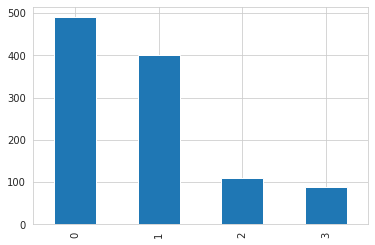

In [74]:
sns.set_style('whitegrid')
df_all_port_indexid['Target'].value_counts().plot(kind = 'bar')

In [75]:
#Criando o X e y
X = df_all_port_indexid.drop('Target', axis=1)
y = df_all_port_indexid['Target']

/home/luiz/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


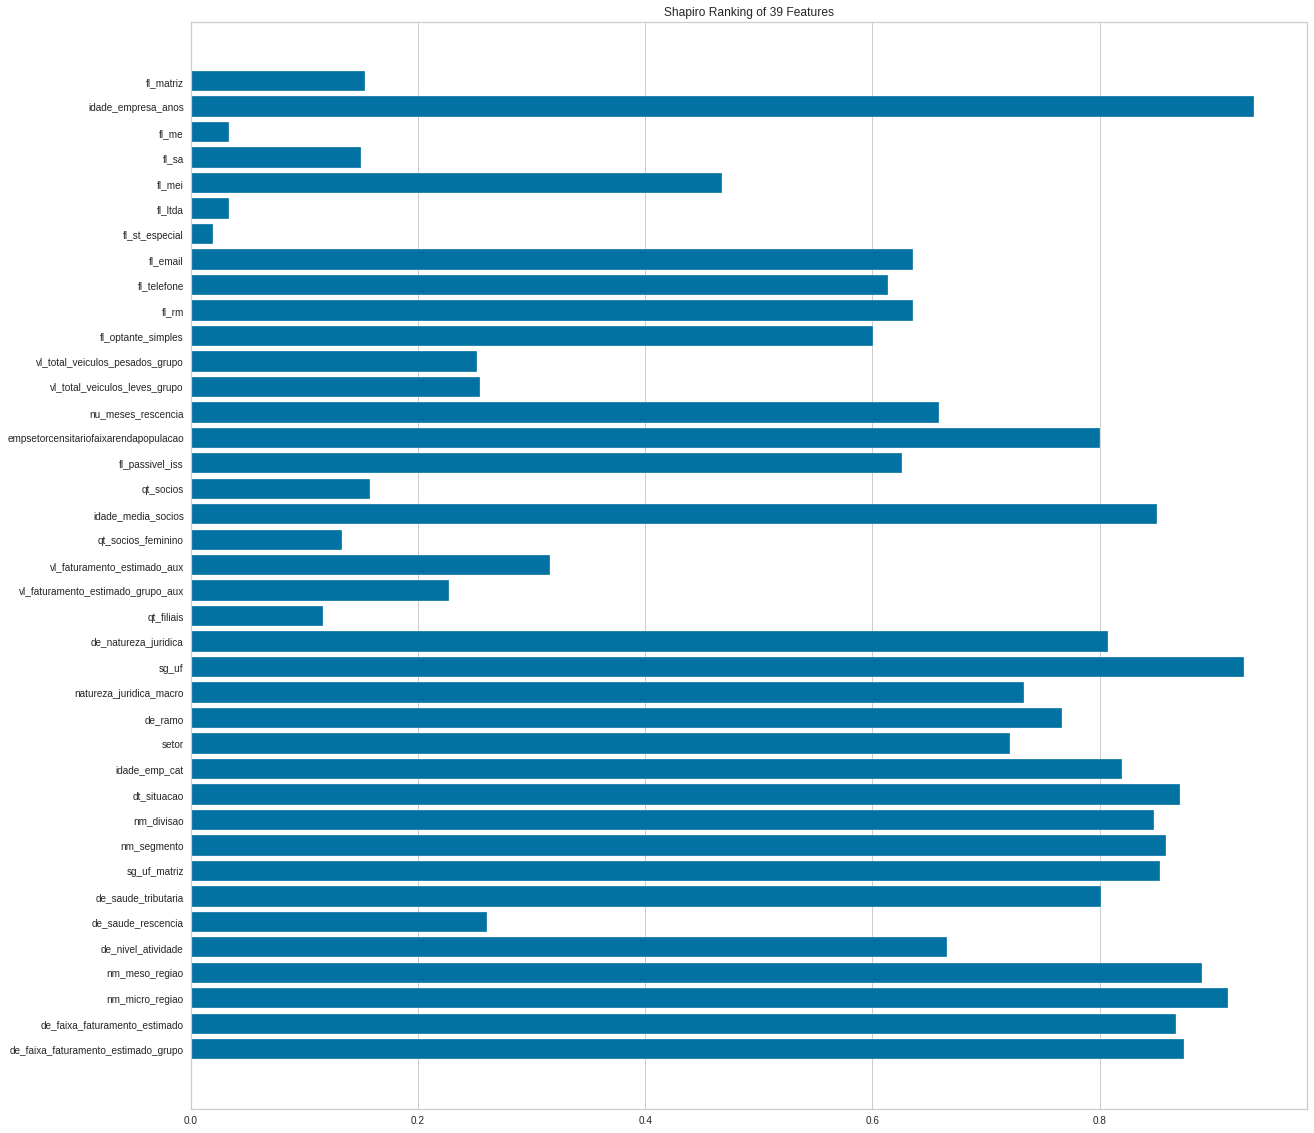

In [77]:
#Visualização da importancia das features usando Shapiro
from yellowbrick.features import Rank1D
# Criando o visualizador
visualizer = Rank1D(algorithm='shapiro')
plt.figure(figsize=(20,20))
visualizer.fit(X, y)           # Fit nos dados para o visualizer
visualizer.transform(X)        # Tranformando os dados
visualizer.show()              # Imprimindo as figuras

## Fazendo aprendizado supervisionado Classificação para aprender quem é do portfólio 1 e quem é do portfólio 2

### Separando a base em treino e teste

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Balanceando com RandomOverSampler

In [83]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [80]:
from tpot import TPOTClassifier

/home/luiz/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/luiz/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [81]:
tp = TPOTClassifier(generations=10, population_size=20, cv=5,
                                    random_state=42, verbosity=2)

In [84]:
tp.fit(X_resampled, y_resampled)

Generation 1 - Current best internal CV score: 0.9611587441684529
Generation 2 - Current best internal CV score: 0.9624532425503298
Generation 3 - Current best internal CV score: 0.9624532425503298
Generation 4 - Current best internal CV score: 0.9624532425503298
Generation 5 - Current best internal CV score: 0.962455344008742
Generation 6 - Current best internal CV score: 0.966336737695961
Generation 7 - Current best internal CV score: 0.966336737695961
Generation 8 - Current best internal CV score: 0.966336737695961
Generation 9 - Current best internal CV score: 0.966336737695961
Generation 10 - Current best internal CV score: 0.966336737695961

Best pipeline: GradientBoostingClassifier(SelectFwe(input_matrix, alpha=0.021), learning_rate=0.5, max_depth=3, max_features=0.8500000000000001, min_samples_leaf=15, min_samples_split=20, n_estimators=100, subsample=0.9000000000000001)


TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=5,
               disable_update_check=False, early_stop=None, generations=10,
               max_eval_time_mins=5, max_time_mins=None, memory=None,
               mutation_rate=0.9, n_jobs=1, offspring_size=None,
               periodic_checkpoint_folder=None, population_size=20,
               random_state=42, scoring=None, subsample=1.0, template=None,
               use_dask=False, verbosity=2, warm_start=False)

In [85]:
#exportanod o modelo
tp.export('modelo.py')
with open('modelo.py') as pipe:
    print("".join(pipe.readlines()))

import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectFwe, f_classif
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from tpot.export_utils import set_param_recursive

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
features = tpot_data.drop('target', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'], random_state=42)

# Average CV score on the training set was: 0.966336737695961
exported_pipeline = make_pipeline(
    SelectFwe(score_func=f_classif, alpha=0.021),
    GradientBoostingClassifier(learning_rate=0.5, max_depth=3, max_features=0.8500000000000001, min_samples_leaf=15, min_samples_split=20, n_estimators=100, subsample=0.9000000000000001)
)
# 

In [136]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectFwe, f_classif
from sklearn.pipeline import make_pipeline
from tpot.export_utils import set_param_recursive
from sklearn.multiclass import OneVsOneClassifier

In [146]:
exported_pipeline = make_pipeline(
    SelectFwe(score_func=f_classif, alpha=0.021),
    GradientBoostingClassifier(learning_rate=0.5, max_depth=3, max_features=0.8500000000000001, min_samples_leaf=15, min_samples_split=20, n_estimators=100, subsample=0.9000000000000001)
)

In [147]:
model = exported_pipeline.fit(X_resampled, y_resampled)
y_pred = exported_pipeline.predict(X_test)

## Curva ROC

/home/luiz/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


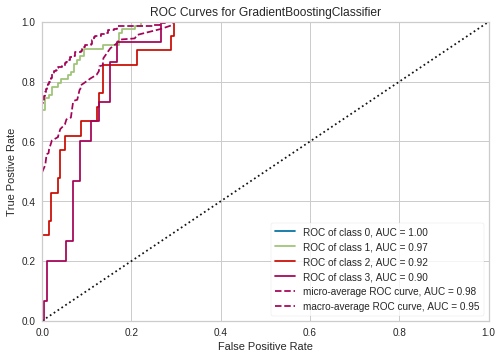

In [148]:
#Curva ROC e Area Abaixo da Curva
from yellowbrick.classifier import ROCAUC
from yellowbrick.datasets import load_spam

visualizer = ROCAUC(model)
visualizer.fit(X_resampled, y_resampled)        
visualizer.score(X_test, y_test)        
visualizer.show()

In [140]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [149]:
print(classification_report(y_pred=y_pred, y_true=y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       104
           1       0.87      0.85      0.86        78
           2       0.46      0.62      0.53        21
           3       0.30      0.20      0.24        15

    accuracy                           0.85       218
   macro avg       0.66      0.67      0.66       218
weighted avg       0.85      0.85      0.85       218



In [150]:
confusion_matrix(y_pred=y_pred, y_true=y_test)

array([[104,   0,   0,   0],
       [  0,  66,   9,   3],
       [  0,   4,  13,   4],
       [  0,   6,   6,   3]])

In [151]:
print("Acurácia (base de treinamento):", model.score(X_resampled, y_resampled))
print("Acurácia de previsão:", accuracy_score(y_test, y_pred))

Acurácia (base de treinamento): 1.0
Acurácia de previsão: 0.8532110091743119


In [144]:
from sklearn.metrics import r2_score

In [152]:
print('R2 score: {:.2f}'.format(r2_score(y_test, y_pred)))

R2 score: 0.66


## Colocando Regularização L2 para evitar o overfitting

In [153]:
from sklearn.linear_model import Ridge, Lasso

In [154]:
ridge = Ridge().fit(X_resampled, y_resampled)
print("Ridge alpha=1")
print("Acurácia na base de treinamento: {:.2f}".format(ridge.score(X_resampled, y_resampled)))
print("Acurácia na base de teste: {:.2f}".format(ridge.score(X_test, y_test)))

ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Ridge alpha=10")
print("Acurácia na base de treinamento: {:.2f}".format(ridge10.score(X_resampled, y_resampled)))
print("Acurácia na base de teste: {:.2f}".format(ridge10.score(X_test, y_test)))


ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Ridge alpha=0.1")
print("Acurácia na base de treinamento: {:.2f}".format(ridge01.score(X_resampled, y_resampled)))
print("Acurácia na base de teste: {:.2f}".format(ridge01.score(X_test, y_test)))


Ridge alpha=1
Acurácia na base de treinamento: 0.72
Acurácia na base de teste: 0.55
Ridge alpha=10
Acurácia na base de treinamento: 0.60
Acurácia na base de teste: 0.68
Ridge alpha=0.1
Acurácia na base de treinamento: 0.61
Acurácia na base de teste: 0.68


/home/luiz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.84351e-20): result may not be accurate.
  overwrite_a=True).T
/home/luiz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.6111e-19): result may not be accurate.
  overwrite_a=True).T
/home/luiz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.62684e-20): result may not be accurate.
  overwrite_a=True).T


In [95]:
y_test.tail()

id
205dcd433329ad0a8b914b4ce399468389d3a256cdcbc5b8374a2fc2021971e7    1
28bc1d74d06eb184ee5a3ee242bae4492ad9df618c9c0fbcf442f22ad9ca6bae    1
9972062f53b10be62fea2303c52c15fd89674ce245f13b3db804f881eed7c654    1
ce2979f832ad09358b4458d514e4fc4af463cbcb778f1736cecd01a342f986a0    1
3af4369fa3199094e1738f9e21f73ca9f459c122ad4c4642b6704e23c9aebf85    1
Name: Target, dtype: int64

In [96]:
y_pred

array([0, 0, 0, 1, 1, 0, 3, 0, 1, 1, 1, 0, 2, 2, 1, 0, 0, 1, 0, 0, 1, 2,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 2, 0, 2, 1, 0, 1, 0, 1, 1, 0, 0, 3, 1,
       2, 1, 0, 1, 1, 1, 1, 0, 2, 1, 2, 0, 0, 1, 2, 1, 0, 1, 0, 0, 1, 0,
       0, 2, 0, 1, 0, 1, 1, 2, 1, 0, 2, 1, 1, 0, 0, 1, 0, 3, 0, 1, 2, 2,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 2, 0, 2,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 1, 0, 1, 1, 2, 1, 0,
       2, 1, 1, 1, 0, 2, 1, 2, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 2, 0, 0, 2, 0, 3, 3, 1, 0, 3, 0, 0, 0, 0, 0,
       0, 3, 3, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 2, 0, 1, 1, 0, 2, 0, 1, 3, 0, 1, 2, 0, 1, 1, 1, 1, 1])

## Prevendo agora no market com a amostra tirada também do portfólio 1

In [97]:
amostra_port1.head()

,id,fl_matriz,idade_empresa_anos,fl_me,fl_sa,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,...,nm_divisao,nm_segmento,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,de_nivel_atividade,nm_meso_regiao,nm_micro_regiao,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo
490,7b31a8c2bf7011c7928cffb9f8225075e7ec2d638ce94e...,1,13.583562,0,0,0,0,0,0,0,...,30,9,20,3,0,1,19,73,10,10
491,aeb22f0dffd6635c319d3de4e465d045b827b1ae490d84...,1,6.706849,0,0,0,0,0,1,1,...,30,9,9,1,0,2,10,30,10,10
492,73af4232ce27d5eefab9ccf9c77b3678b3beab9d675852...,1,1.624658,0,0,1,0,0,1,1,...,30,9,19,2,1,2,6,48,10,10
493,37a308088cc7793d61413571e197ecf18e4b9fbc96fa88...,1,31.424658,0,0,0,0,0,0,0,...,30,9,2,4,0,0,2,23,10,10
494,a05a86ad99266c82bbb2a7019826ce2d8e64569cc3b4f5...,1,3.460274,0,0,0,0,0,1,1,...,30,9,9,4,0,0,8,0,2,2


In [98]:
amostra_port1_indexid = amostra_port1.copy()
amostra_port2_indexid = amostra_port2.copy()
amostra_port3_indexid = amostra_port3.copy()
amostra_port4_indexid = amostra_port4.copy()

In [99]:
amostra_port1_indexid.set_index('id', inplace=True)
amostra_port2_indexid.set_index('id', inplace=True)
amostra_port3_indexid.set_index('id', inplace=True)
amostra_port4_indexid.set_index('id', inplace=True)

In [100]:
just_market.head()

,fl_matriz,idade_empresa_anos,fl_me,fl_sa,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,fl_rm,...,nm_segmento,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,de_nivel_atividade,nm_meso_regiao,nm_micro_regiao,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,id
0,1,14.457534,0,0,0,0,0,1,1,1,...,10,19,4,0,0,6,48,2,2,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...
1,1,1.463014,0,0,1,0,0,1,1,1,...,3,16,2,1,1,4,69,10,10,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...
2,1,7.093151,0,0,1,0,0,0,1,1,...,20,2,0,0,2,2,43,1,1,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...
3,1,6.512329,0,0,0,0,0,1,1,1,...,17,2,0,0,2,2,43,10,10,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...
4,1,3.200000,0,0,0,0,0,1,1,1,...,8,19,4,0,0,6,48,10,10,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...


In [101]:
just_market_indexid = just_market.copy()

In [102]:
just_market_indexid.set_index('id', inplace=True)

In [103]:
base_test_all_port= pd.concat([amostra_port1_indexid,amostra_port2_indexid,amostra_port3_indexid,amostra_port4_indexid, just_market_indexid],axis=0)

In [104]:
base_test_all_port.shape

(461210, 39)

In [111]:
amostra_port2_indexid.shape

(58, 39)

In [105]:
X_test_base = base_test_all_port

In [155]:
y_pred_test = exported_pipeline.predict(X_test_base)

In [159]:
pd.DataFrame(y_pred_test)[0].value_counts()

0    457899
1      2931
2       234
3       146
Name: 0, dtype: int64

## Criando um y_test com as amostras para ver a acurácia 

In [115]:
amostra_port1_indexid_target = amostra_port1_indexid.copy()
amostra_port2_indexid_target = amostra_port2_indexid.copy()
amostra_port3_indexid_target = amostra_port3_indexid.copy()
amostra_port4_indexid_target = amostra_port4_indexid.copy()

In [116]:
amostra_port1_indexid_target['Target'] = 0
amostra_port2_indexid_target['Target'] = 1
amostra_port3_indexid_target['Target'] = 2
amostra_port4_indexid_target['Target'] = 3

In [117]:
base_y_test_all_port = pd.concat([amostra_port1_indexid_target,amostra_port2_indexid_target,amostra_port3_indexid_target,amostra_port4_indexid_target],axis=0)

In [120]:
base_y_test_all_port.head()

,fl_matriz,idade_empresa_anos,fl_me,fl_sa,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,fl_rm,...,nm_segmento,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,de_nivel_atividade,nm_meso_regiao,nm_micro_regiao,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,Target
id,,,,,,,,,,,,,,,,,,,,,
7b31a8c2bf7011c7928cffb9f8225075e7ec2d638ce94e09dbc0032aacaef953,1,13.583562,0,0,0,0,0,0,0,0,...,9,20,3,0,1,19,73,10,10,0
aeb22f0dffd6635c319d3de4e465d045b827b1ae490d844ddb749c616b78807f,1,6.706849,0,0,0,0,0,1,1,1,...,9,9,1,0,2,10,30,10,10,0
73af4232ce27d5eefab9ccf9c77b3678b3beab9d675852c645ce6b93b1a41c2e,1,1.624658,0,0,1,0,0,1,1,1,...,9,19,2,1,2,6,48,10,10,0
37a308088cc7793d61413571e197ecf18e4b9fbc96fa88471da4cc07c44e693f,1,31.424658,0,0,0,0,0,0,0,0,...,9,2,4,0,0,2,23,10,10,0
a05a86ad99266c82bbb2a7019826ce2d8e64569cc3b4f5bf8fb4467f9bb8fe66,1,3.460274,0,0,0,0,0,1,1,1,...,9,9,4,0,0,8,0,2,2,0


In [124]:
base_y_test_all_port.shape

(190, 40)

In [160]:
y_pred_test_test = pd.DataFrame(y_pred_test, columns = ['Target'])[:190]

In [161]:
print("Acurácia de previsão:", accuracy_score(base_y_test_all_port['Target'], y_pred_test_test['Target']))

Acurácia de previsão: 0.7421052631578947
